<a href="https://colab.research.google.com/github/yashyaks/ML-playground/blob/main/ACL/ACL_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Fake-News-Detection-Using-RNN
# Detect fake news using a recurrent neural network, The dataset is from Kaggle (https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
fake_df = pd.read_csv('/content/Fake.csv')
real_df = pd.read_csv('/content/True.csv')

In [ ]:
print(fake_df.isnull().sum())
print(real_df.isnull().sum())

title      0
text       0
subject    0
date       0
dtype: int64
title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
fake_df.drop(['date', 'subject'], axis=1, inplace=True)
real_df.drop(['date', 'subject'], axis=1, inplace=True)

In [ ]:
fake_df['class'] = 0
real_df['class'] = 1

In [ ]:
fake_df

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


Text(0, 0.5, '# of News Articles')

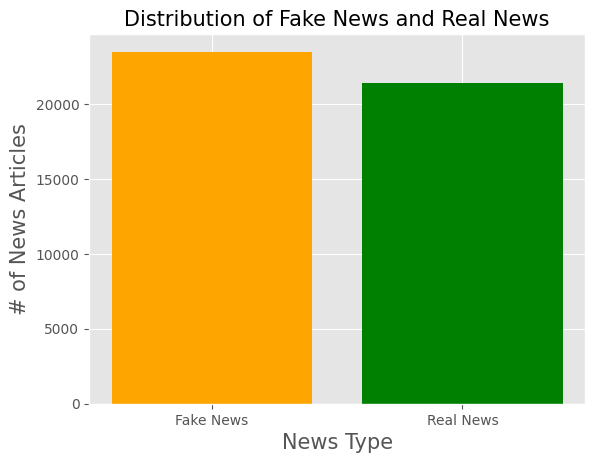

In [ ]:
plt.figure()
plt.bar('Fake News', len(fake_df), color='orange')
plt.bar('Real News', len(real_df), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)

In [ ]:
news_df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)
news_df

,title,text,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [ ]:
news_df['text'] = news_df['title'] + news_df['text']
news_df.drop('title', axis=1, inplace=True)

In [ ]:
features = news_df['text']
targets = news_df['class']

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.20, random_state=18)

In [ ]:
def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

In [ ]:
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

In [ ]:
def create_rnn_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=max_vocab, output_dim=128))
    model.add(tf.keras.layers.SimpleRNN(64, return_sequences=False))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

rnn_model = create_rnn_model()
rnn_model.build((None, max_length))
rnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,292,417 (4.93 MB)

 Trainable params: 1,292,417 (4.93 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def create_lstm_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=max_vocab, output_dim=128))
    model.add(tf.keras.layers.LSTM(64, return_sequences=False))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_model.build((None, max_length))
lstm_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,329,473 (5.07 MB)

 Trainable params: 1,329,473 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def create_gru_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=max_vocab, output_dim=128))
    model.add(tf.keras.layers.GRU(64, return_sequences=False))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
gru_model = create_gru_model()
gru_model.build((None, max_length))
gru_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test, epochs=5, batch_size=64):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    return history

In [ ]:
# Train RNN Model
print("Training RNN Model...")
rnn_history = train_model(rnn_model, X_train, y_train, X_test, y_test)

Training RNN Model...
Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.8999 - loss: 0.2353 - val_accuracy: 0.9493 - val_loss: 0.1392
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.9793 - loss: 0.0637 - val_accuracy: 0.9794 - val_loss: 0.0629
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9957 - loss: 0.0169 - val_accuracy: 0.9786 - val_loss: 0.0762
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 33s 58ms/step - accuracy: 0.9973 - loss: 0.0086 - val_accuracy: 0.9791 - val_loss: 0.0776
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 34s 60ms/step - accuracy: 0.9982 - loss: 0.0063 - val_accuracy: 0.9460 - val_loss: 0.1769


In [ ]:
# Train LSTM Model
print("Training LSTM Model...")
lstm_history = train_model(lstm_model, X_train, y_train, X_test, y_test)

Training LSTM Model...
Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 91s 157ms/step - accuracy: 0.9248 - loss: 0.2150 - val_accuracy: 0.9798 - val_loss: 0.0646
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step - accuracy: 0.9865 - loss: 0.0434 - val_accuracy: 0.9827 - val_loss: 0.0542
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 139s 152ms/step - accuracy: 0.9933 - loss: 0.0219 - val_accuracy: 0.9735 - val_loss: 0.0770
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 142s 152ms/step - accuracy: 0.9930 - loss: 0.0189 - val_accuracy: 0.9793 - val_loss: 0.0698
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 90s 161ms/step - accuracy: 0.9985 - loss: 0.0063 - val_accuracy: 0.9843 - val_loss: 0.0823


In [ ]:
# Train GRU Model
print("Training GRU Model...")
gru_history = train_model(gru_model, X_train, y_train, X_test, y_test)

Training GRU Model...
Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 96s 167ms/step - accuracy: 0.8928 - loss: 0.2332 - val_accuracy: 0.9736 - val_loss: 0.0803
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 93s 166ms/step - accuracy: 0.9859 - loss: 0.0473 - val_accuracy: 0.9807 - val_loss: 0.0625
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 93s 166ms/step - accuracy: 0.9930 - loss: 0.0232 - val_accuracy: 0.9814 - val_loss: 0.0584
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 94s 166ms/step - accuracy: 0.9960 - loss: 0.0134 - val_accuracy: 0.9494 - val_loss: 0.1346
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 95s 168ms/step - accuracy: 0.9934 - loss: 0.0194 - val_accuracy: 0.9841 - val_loss: 0.0649


In [ ]:
def evaluate_model(model, history, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    train_loss = history.history['loss'][-1]
    train_accuracy = history.history['accuracy'][-1]
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

In [ ]:
print("Evaluating RNN Model...")
evaluate_model(rnn_model, rnn_history, X_test, y_test)

Evaluating RNN Model...
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9476 - loss: 0.1661
Test Loss: 0.1769, Test Accuracy: 0.9460
Train Loss: 0.0087, Train Accuracy: 0.9973


In [ ]:
print("Evaluating LSTM Model...")
evaluate_model(lstm_model, lstm_history, X_test, y_test)

Evaluating LSTM Model...
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9830 - loss: 0.0851
Test Loss: 0.0823, Test Accuracy: 0.9843
Train Loss: 0.0077, Train Accuracy: 0.9979


In [ ]:
print("Evaluating GRU Model...")
evaluate_model(gru_model, gru_history, X_test, y_test)

Evaluating GRU Model...
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.9836 - loss: 0.0681
Test Loss: 0.0649, Test Accuracy: 0.9841
Train Loss: 0.0112, Train Accuracy: 0.9967
